<a href="https://colab.research.google.com/github/XtianCarlosQ/Clase1/blob/master/Modulometro_IA_V6_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ADQUISICION DE DATOS (CREACIÓN DE DATAFRAME)

In [0]:
import os
import skimage.io as imd
import numpy as np
import pandas as pd

In [0]:
# Halla el número de fibras de una foto: "directorio|nombre.jpg"
def Nro_Fibras(cod_name, dataset_directory,name_dataset):
    dataset=pd.read_csv(os.path.join(dataset_directory,name_dataset))
    #print(dataset)
    df=pd.DataFrame(dataset)
    #print(df)
    #print(cod_name)
    
    Nro_Fibras=float(df[df['Nombre'].str.lower()==cod_name.lower()]['Nro_Fibras'])
    #print(Nro_Fibras)
    return Nro_Fibras

def load_ml_data(data_directory,type_data,name_dataset):
    dirs = [d for d in os.listdir(os.path.join(data_directory,type_data))
            if os.path.isdir(os.path.join(os.path.join(data_directory,type_data),d))]
    
    labels = []
    #images = []
    filenames=[]
    for d in dirs:
        label_dir = os.path.join(os.path.join(data_directory,type_data), d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".jpg")]
        
        for f in file_names:
            #Para Spyder"\\""
            #name=f.split("\\")[-1] #nombre_foto (ejm: 'M10.1.jpg' )
            #Para Colab"/""
            name=f.split("/")[-1] #nombre_foto (ejm: 'M10.1.jpg' )
            #print(name)
            #images.append(imd.imread(f))
            dir_name=str(d[len("FOTOS_"):len(d)]+"|"+name)#nombre_dir|foto (ejm: '11.055x|M10.1.jpg' )
            #print(dir_name)
            #print(data_directory)
           # print(name_dataset)
            filenames.append(os.path.join(label_dir,f))
            labels.append(Nro_Fibras(dir_name,data_directory,name_dataset))
        
    return labels, filenames

In [0]:
#main_dir = r'C:\Users\Usuario\Proyectos\Medulómetro IA\data\Muestras Totales'
#data_directory=r'C:\Users\Usuario\Proyectos\Medulómetro IA\data'
data_directory='/content/drive/My Drive/Proyectos/MODULOMETRO IA/data'
name_dataset='Dataset.csv'
train_data_dir = 'Training'
test_data_dir = 'Testing'

In [5]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

scaler1 = StandardScaler()
scaler1.fit(y_train)
y_train_scaled = scaler1.transform(y_train)
y_val_scaled = scaler1.transform(y_val)
y_test_scaled = scaler1.transform(y_test)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(x_train)\nx_train_scaled = scaler.transform(x_train)\nx_val_scaled = scaler.transform(x_val)\nx_test_scaled = scaler.transform(x_test)\n\nscaler1 = StandardScaler()\nscaler1.fit(y_train)\ny_train_scaled = scaler1.transform(y_train)\ny_val_scaled = scaler1.transform(y_val)\ny_test_scaled = scaler1.transform(y_test)'

In [6]:
labels,filenames=load_ml_data(data_directory,train_data_dir,name_dataset)
data_frame_training=pd.DataFrame({'filename':filenames, 'label':labels})
data_frame_training.head(10)
columns=["label"]
#Datos de testing
labels_testing, filenames_testing=load_ml_data(data_directory, test_data_dir,name_dataset)
data_frame_testing=pd.DataFrame({'filename':filenames_testing, 'label':labels_testing})
print("Terminé")



Terminé


In [0]:
#data_frame_testing

#CREACIÓN DE CNN

In [0]:
from keras.models import Sequential #Para inicializar los pesos cercanos a cero
from keras.layers import Conv2D #Para RNA en 2D (antes era Convolution2D)
from keras.layers import MaxPooling2D #Para RNA en 3D
from keras.layers import Flatten #Para hacer el aplando o Flattering
from keras.layers import Dense #Para hacer SINAPSIS entre las capas de RNA
from keras.layers import Dropout

In [6]:
# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
# filters: número de filtros igual al número de mapas de características
# kernel_size: tamaño de matriz que sirvirá para realizar la convolución
# input_shape: tamaño de la imagen(64x64) y colores = 1 (negro) 3 (RGB)
# activation: se aplica "relu" para evitar linealidad
classifier.add(Conv2D(filters = 256,kernel_size = (3, 3), 
                      input_shape = (256, 256, 1), activation = "relu"))

# Paso 2 - Max Pooling
# pool_size: tamaño de nuestra matriz de max_poling(2x2) para extraer las caracteristicas invariables de la matriz de caracteríscas
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 256,kernel_size = (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Tercera capa de convolución y max pooling
classifier.add(Conv2D(filters = 256,kernel_size = (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Paso 3 - Flattening
classifier.add(Flatten())

# Paso 4 - Full Connection
# units: número de nueronas en la capa
# activation: función de activación a usar
classifier.add(Dense(units = 256, activation = "relu"))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 64, activation = "relu"))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1, activation = "linear"))

# Compilar la CNN
classifier.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy","mean_squared_error"])
print("Terminé")

Terminé


In [10]:
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 256)     2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 256)     590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)           

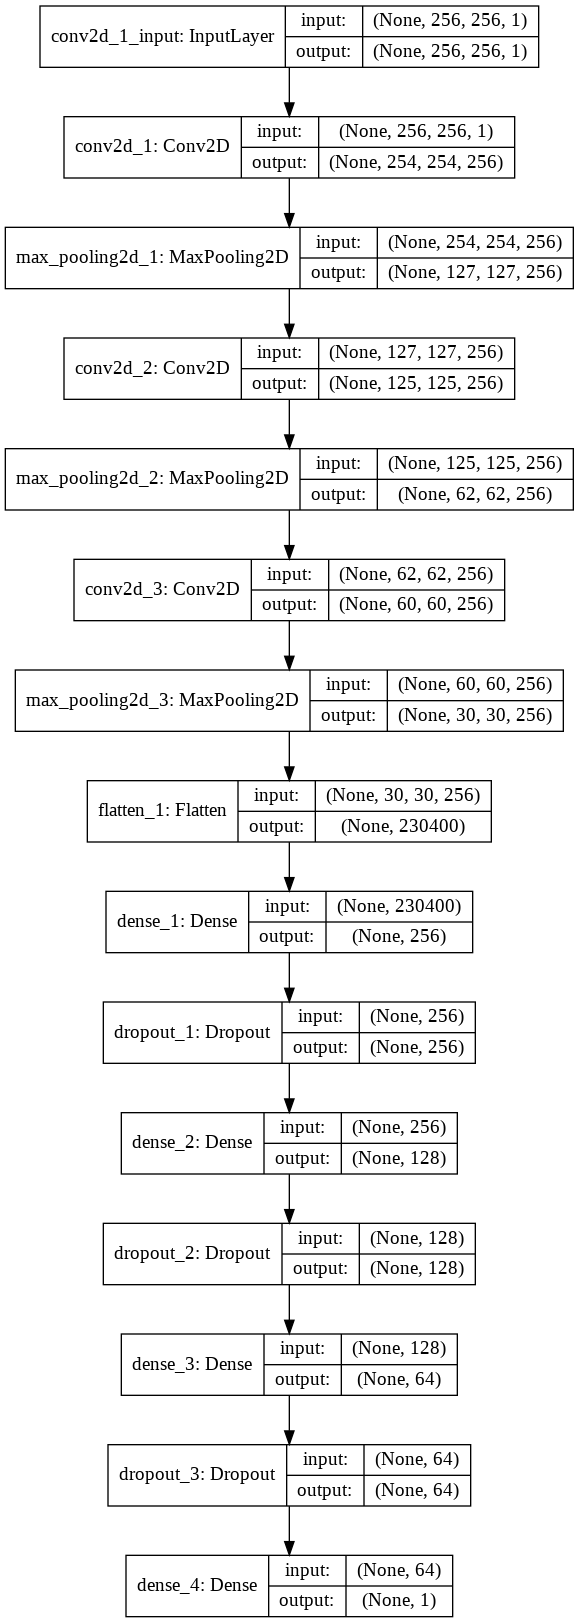

In [7]:
#Resumen gráfico
from keras.utils import plot_model
plot_model(classifier, show_shapes=True, to_file='/content/drive/My Drive/Proyectos/MODULOMETRO IA/Modulometro_IA_V6.png')

# PREPROCESAMIENTO DE IMAGENES

### **OBSERVACION**:


> No me convence el 'class_mode'. No encontré alguno que lo clasifique a modo de contador. El usado es para clasificar



In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,
                                   rotation_range = 5,
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_dataframe(dataframe=data_frame_training, directory=None,
                                                     x_col='filename',
                                                     y_col=columns,
                                                     color_mode="grayscale",
                                                     target_size=(256,256),
                                                     class_mode="raw",
                                                     batch_size=32)
testing_set = test_datagen.flow_from_dataframe(dataframe=data_frame_testing, directory=None,
                                            x_col='filename',
                                            y_col=columns,
                                            color_mode="grayscale",
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = "raw")

Found 900 validated image filenames.
Found 100 validated image filenames.


# ENTRENAMIENTO

## Verificar disponibilidad de GPU

###**OBS:** No logré que funcione con el TPU

In [12]:
import tensorflow as tf
nombre_gpu = tf.test.gpu_device_name()
if nombre_gpu != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('GPU encontrada: {}'.format(nombre_gpu))

GPU encontrada: /device:GPU:0


## Entrenamiento con GPU

In [13]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 900,
                         epochs = 16,
                         validation_data = testing_set,
                         validation_steps = 7)

pred=classifier.predict_generator(testing_set)
# pred.tolist()

data_frame_training=pd.DataFrame({'filename':filenames, 'label':labels})
data_frame_predictions=pd.DataFrame({'fileaname':filenames_testing, 'label': labels_testing,'label_pred':pred.tolist()})
# data_frame_predictions

data_frame_predictions.to_csv('/content/drive/My Drive/Proyectos/MODULOMETRO IA/predicciones_v6_GPU_Normalizacion10(GG).csv')

Epoch 1/16
900/900 [==============================] - 832s 925ms/step - loss: 0.0819 - accuracy: 0.0721 - mean_squared_error: 0.0826 - val_loss: 0.1709 - val_accuracy: 0.1122 - val_mean_squared_error: 0.1755
Epoch 2/16
900/900 [==============================] - 833s 925ms/step - loss: 0.0298 - accuracy: 0.0742 - mean_squared_error: 0.0299 - val_loss: 0.1211 - val_accuracy: 0.1131 - val_mean_squared_error: 0.1428
Epoch 3/16
900/900 [==============================] - 851s 946ms/step - loss: 0.0286 - accuracy: 0.0743 - mean_squared_error: 0.0286 - val_loss: 0.0441 - val_accuracy: 0.1310 - val_mean_squared_error: 0.0706
Epoch 4/16
900/900 [==============================] - 837s 930ms/step - loss: 0.0533 - accuracy: 0.0725 - mean_squared_error: 0.0538 - val_loss: 0.3712 - val_accuracy: 0.1071 - val_mean_squared_error: 0.5520
Epoch 5/16
900/900 [==============================] - 860s 956ms/step - loss: 0.1113 - accuracy: 0.0745 - mean_squared_error: 0.1113 - val_loss: 0.5827 - val_accuracy: 

#EVALUCION DE RESULTADOS

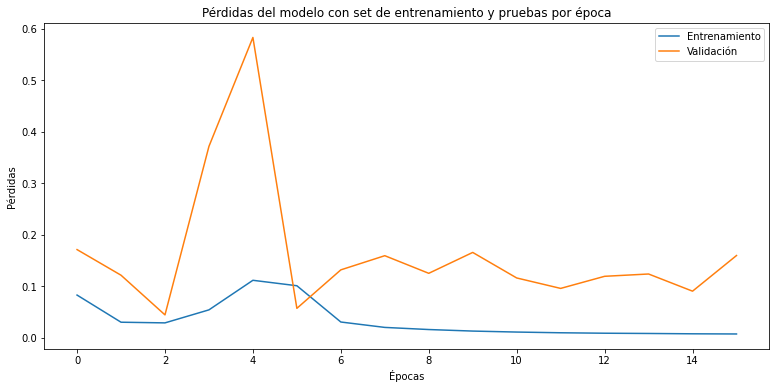

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,6))
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

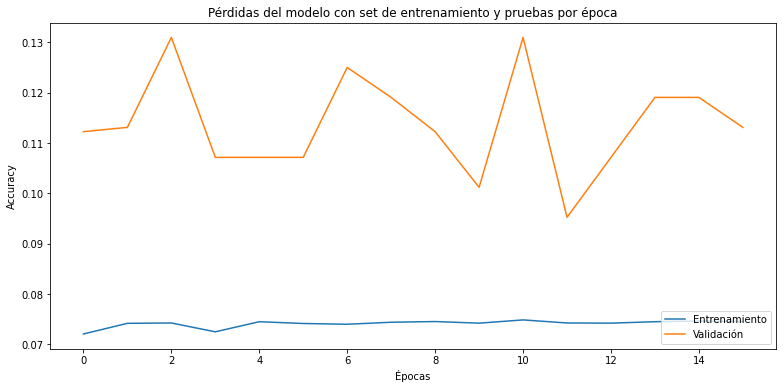

In [15]:
plt.figure(figsize=(13,6))
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()